In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rcParams.update({'font.size': 14})
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgbm
from catboost import CatBoostRegressor, Pool
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [2]:
df = pd.read_csv('/Users/si/data.csv')
df.head(5)

,group,mentions,post_uid,date,post_type,format,uid,author,shared,shared_author,...,shares,total_engagements,potential_reach,eng_rate,impressions,yt_dislikes,avg_ccv,peak_ccv,duration,measured
0,generic_words,1,bf612b87e2a533e6bbff4a72f9602721,2020-02-12T00:19:58+0000,IMAGE,NaN,733167615cbe4c16afe1310786a94875,elrufas,NaN,NaN,...,0.0,42852.0,472725.0,0.090649,NaN,NaN,NaN,NaN,NaN,1.0
1,generic_words,1,1879e56cbe2a38beb6086fb6d7cbba5d,2020-02-14T03:53:43+0000,IMAGE,STORY,bb6ec127f3234f40a135d2ef79d9a71d,jamieout,NaN,NaN,...,NaN,NaN,163530.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,generic_words,1,c92f21df08c738acb11ec61789e806c8,2020-02-14T03:56:22+0000,VIDEO,STORY,bb6ec127f3234f40a135d2ef79d9a71d,jamieout,NaN,NaN,...,NaN,NaN,163530.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,generic_words,1,ab79826bdfe331ab86e825bcab202303,2020-02-07T18:20:54+0000,VIDEO,STORY,1faf226854fe4e458facacfd22fe8b79,milynette,NaN,NaN,...,NaN,NaN,1474126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,generic_words,1,b212823b4d093de3943e18f25248797f,2020-02-07T23:16:53+0000,VIDEO,STORY,1faf226854fe4e458facacfd22fe8b79,milynette,NaN,NaN,...,NaN,NaN,1474126.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.columns

Index(['group', 'mentions', 'post_uid', 'date', 'post_type', 'format', 'uid',
       'author', 'shared', 'shared_author', 'title', 'url', 'thumbnail_url',
       'platform', 'channel_uid', 'video_views', 'reactions', 'comments',
       'shares', 'total_engagements', 'potential_reach', 'eng_rate',
       'impressions', 'yt_dislikes', 'avg_ccv', 'peak_ccv', 'duration',
       'measured'],
      dtype='object')

In [5]:
# drop rows where impression is na
df.dropna(subset=['impressions'], axis=0, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 940579 entries, 1172 to 1202323
Data columns (total 28 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   group              940579 non-null  object             
 1   mentions           940579 non-null  int64              
 2   post_uid           940579 non-null  object             
 3   date               940579 non-null  datetime64[ns, UTC]
 4   post_type          940579 non-null  object             
 5   format             678098 non-null  object             
 6   uid                940579 non-null  object             
 7   author             940579 non-null  object             
 8   shared             0 non-null       float64            
 9   shared_author      0 non-null       float64            
 10  title              940553 non-null  object             
 11  url                940579 non-null  object             
 12  thumbnail_url      940579 

In [7]:
validation_df = df[(df['date']>='2021-01-01') & (df['date']<='2021-01-15')]
validation_df

,group,mentions,post_uid,date,post_type,format,uid,author,shared,shared_author,...,shares,total_engagements,potential_reach,eng_rate,impressions,yt_dislikes,avg_ccv,peak_ccv,duration,measured
2629,generic_words,1,54b51e729d4636d8b828114946d5d313,2021-01-02 00:44:52+00:00,IMAGE,STORY,fca25ed9812245c9a096a909b997df0f,glambymykaila,NaN,NaN,...,NaN,0.0,78195.0,0.000000,1194.0,NaN,NaN,NaN,NaN,1.0
2630,generic_words,1,b3c7f2d2ca763737911b243661b6922a,2021-01-02 00:41:47+00:00,IMAGE,STORY,fca25ed9812245c9a096a909b997df0f,glambymykaila,NaN,NaN,...,NaN,0.0,78195.0,0.000000,1283.0,NaN,NaN,NaN,NaN,1.0
2631,generic_words,1,435c752614a137abb18a6817ac751e6e,2021-01-02 00:53:45+00:00,IMAGE,STORY,cb7968b5f0c248f388b4bf3b0a0afcdb,sharmtoaster,NaN,NaN,...,NaN,0.0,44497.0,0.000000,2435.0,NaN,NaN,NaN,NaN,1.0
2648,generic_words,1,2d64972d3e653da5baa3b5259c35b9b0,2021-01-01 14:34:56+00:00,VIDEO,STORY,fca25ed9812245c9a096a909b997df0f,glambymykaila,NaN,NaN,...,NaN,0.0,78195.0,0.000000,860.0,NaN,NaN,NaN,NaN,1.0
2649,generic_words,1,45bc9aa6e24a3660abaab55b9a001adc,2021-01-01 16:51:31+00:00,IMAGE,STORY,744a9c7087e34b7386e217c2b7b39960,hollysilius,NaN,NaN,...,NaN,0.0,36754.0,0.000000,389.0,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202027,generic_words,1,3a902aba18ea34d3b70fba5bcbe76f8f,2021-01-09 11:28:13+00:00,IMAGE,NaN,aa1d9fbca2264864a4ecd1305ab950df,aglimpseofrach,NaN,NaN,...,NaN,723.0,21375.0,0.033825,35141.0,NaN,NaN,NaN,NaN,1.0
1202034,generic_words,1,31e5675dc75a35f2933c4fbbde32df49,2021-01-14 09:20:20+00:00,IMAGE,NaN,aa1d9fbca2264864a4ecd1305ab950df,aglimpseofrach,NaN,NaN,...,NaN,923.0,21375.0,0.043181,44990.0,NaN,NaN,NaN,NaN,1.0
1202044,generic_words,1,fa3dfec681dd33aaac8399e4d593cedc,2021-01-12 11:49:41+00:00,IMAGE,NaN,aa1d9fbca2264864a4ecd1305ab950df,aglimpseofrach,NaN,NaN,...,NaN,323.0,21375.0,0.015111,9244.0,NaN,NaN,NaN,NaN,1.0
1202049,generic_words,1,c99a6e1ff7c23793a543aba037645b3a,2021-01-11 10:29:27+00:00,IMAGE,NaN,aa1d9fbca2264864a4ecd1305ab950df,aglimpseofrach,NaN,NaN,...,NaN,502.0,21375.0,0.023485,14366.0,NaN,NaN,NaN,NaN,1.0


In [8]:
df = df[df['date']<='2020-12-31']
df

,group,mentions,post_uid,date,post_type,format,uid,author,shared,shared_author,...,shares,total_engagements,potential_reach,eng_rate,impressions,yt_dislikes,avg_ccv,peak_ccv,duration,measured
1172,generic_words,1,97f7d51b3e65349a8f0ec4d4ca85ca0b,2020-12-14 14:53:48+00:00,VIDEO,STORY,8be15a69487a470da853acf748f3d686,kayavine,NaN,NaN,...,NaN,0.0,903497.0,0.000000,45802.0,NaN,NaN,NaN,NaN,1.0
1178,generic_words,1,2b040b8be24439ebb48af5b5c5c21510,2020-12-14 17:07:35+00:00,IMAGE,STORY,beef4076dffa49d4aee9ad736c2f8186,annamaradan,NaN,NaN,...,NaN,0.0,34712.0,0.000000,1275.0,NaN,NaN,NaN,NaN,1.0
1179,generic_words,1,9fbf928f88063d41bbf8b8e71b41699b,2020-12-14 17:19:48+00:00,VIDEO,STORY,8a75a10c16a446aeb30fec84aabc8e4a,themantraco,NaN,NaN,...,NaN,0.0,1062524.0,0.000000,11481.0,NaN,NaN,NaN,NaN,1.0
1180,generic_words,1,cbe95041d3673f038df167647b3380a3,2020-12-13 15:30:07+00:00,VIDEO,STORY,7f607f0de7b045f69e9086d22608c571,loveandsundays,NaN,NaN,...,NaN,0.0,29993.0,0.000000,1698.0,NaN,NaN,NaN,NaN,1.0
1181,generic_words,1,71c80103bf6f378091bde400166914ba,2020-12-13 13:17:45+00:00,VIDEO,STORY,7f607f0de7b045f69e9086d22608c571,loveandsundays,NaN,NaN,...,NaN,0.0,29993.0,0.000000,1832.0,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1202079,generic_words,1,b5fd1440011b36109f874436ed5834b5,2020-12-30 11:29:17+00:00,IMAGE,NaN,a2773654c1cc426ca493bdd4a98728ea,dudu_kgoebane,NaN,NaN,...,NaN,1327.0,12048.0,0.110143,12062.0,NaN,NaN,NaN,NaN,1.0
1202080,generic_words,1,c738fe7f060b3994bbc860aaf2e98bf9,2020-12-30 19:56:46+00:00,IMAGE,NaN,74abc35429a74bca949869f734c1ec8a,ianfrombigtiregarage,NaN,NaN,...,NaN,1313.0,98267.0,0.013362,27329.0,NaN,NaN,NaN,NaN,1.0
1202081,generic_words,1,5b7db89d54b53d8084210e95870d590b,2020-12-30 15:40:50+00:00,IMAGE,NaN,eea5a41fc74f44bda00bf1169c70c066,vickymartinberrocal,NaN,NaN,...,NaN,11860.0,1001471.0,0.011843,338104.0,NaN,NaN,NaN,NaN,1.0
1202082,generic_words,1,66754d981aab3aaf8dfd8469eff56c96,2020-12-30 12:36:56+00:00,IMAGE,NaN,d21151feda474482b3618772116ba906,thebakerbeauty,NaN,NaN,...,NaN,321.0,2603.0,0.123319,825.0,NaN,NaN,NaN,NaN,1.0


In [9]:
# don't have values of engagement metrics for story. so impute values of MOST RECENT None-story post
# df = df.sort_values(by = ['uid', 'date'])
# df = df.groupby('uid').ffill().reindex(df.columns, axis=1)

# reset video_views to 0 for IMAGE post
df['video_views'] = np.where(df.post_type == 'IMAGE', 0, df['video_views'])

In [10]:
# fill na for format where it's either a STORY or not a STORY
df.format.fillna('NOT STORY', inplace=True)

# fill na for video_views where video_views is 0
df.video_views.fillna(0, inplace=True)

# fill na for comments where comments is 0
df.comments.fillna(0, inplace=True)

# fill na for comments where reaction is 0
df.reactions.fillna(0, inplace=True)

In [11]:
df.isnull().sum()

group                     0
mentions                  0
post_uid                  0
date                      0
post_type                 0
format                    0
uid                       0
author                    0
shared               614310
shared_author        614310
title                    19
url                       0
thumbnail_url             0
platform                  0
channel_uid               0
video_views               0
reactions                 0
comments                  0
shares               614310
total_engagements         0
potential_reach          14
eng_rate                 14
impressions               0
yt_dislikes          614310
avg_ccv              614310
peak_ccv             614310
duration             614310
measured                  0
dtype: int64

In [12]:
# drop na potential reach
df.dropna(subset=['potential_reach'], axis=0, inplace=True)

# EDA

In [13]:
df = df[['uid', 'date', 'post_type', 'format', 'video_views', 'reactions', 'comments', 'potential_reach', 'impressions']]
df.head()

,uid,date,post_type,format,video_views,reactions,comments,potential_reach,impressions
1172,8be15a69487a470da853acf748f3d686,2020-12-14 14:53:48+00:00,VIDEO,STORY,0.0,0.0,0.0,903497.0,45802.0
1178,beef4076dffa49d4aee9ad736c2f8186,2020-12-14 17:07:35+00:00,IMAGE,STORY,0.0,0.0,0.0,34712.0,1275.0
1179,8a75a10c16a446aeb30fec84aabc8e4a,2020-12-14 17:19:48+00:00,VIDEO,STORY,0.0,0.0,0.0,1062524.0,11481.0
1180,7f607f0de7b045f69e9086d22608c571,2020-12-13 15:30:07+00:00,VIDEO,STORY,0.0,0.0,0.0,29993.0,1698.0
1181,7f607f0de7b045f69e9086d22608c571,2020-12-13 13:17:45+00:00,VIDEO,STORY,0.0,0.0,0.0,29993.0,1832.0


In [14]:
a = df.groupby('post_type').agg({'format':'count', 'video_views':'mean', 'reactions':'mean', 
    'comments':'mean', 'potential_reach':'mean', 'impressions':'mean'}).rename(columns={'format': 'count'})
a

,count,video_views,reactions,comments,potential_reach,impressions
post_type,,,,,,
IMAGE,360837,0.000000,2755.206592,138.623908,139967.006452,38069.902978
VIDEO,253459,3621.116125,454.331959,12.120848,171430.019699,21664.496364


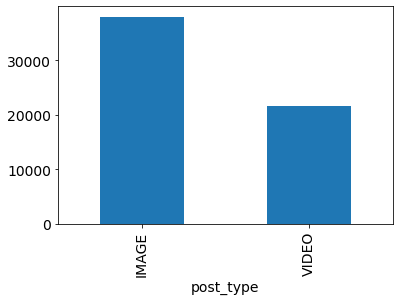

In [15]:
a.impressions.plot(kind='bar');

In [16]:
b = df.groupby('format').agg({'post_type':'count', 'video_views':'mean', 'reactions':'mean', 'comments':'mean', 'potential_reach':'mean', 'impressions':'mean'}).rename(columns={'post_type': 'count'})
b

,count,video_views,reactions,comments,potential_reach,impressions
format,,,,,,
NOT STORY,214225,4284.301421,5178.363893,247.836494,163954.357391,62268.965611
STORY,400071,0.000000,0.000000,0.000000,147055.482297,14718.692450


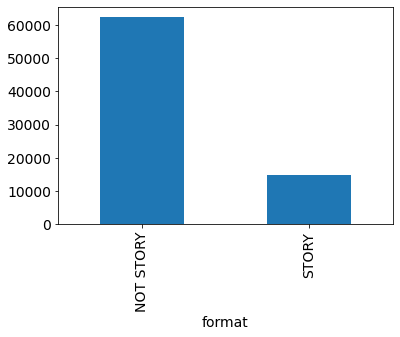

In [17]:
b.impressions.plot(kind='bar');

In [18]:
# remove stories from the dataset as we don't have engagement data for it. And the model performance is not good
df = df[df['format'] != 'STORY']

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


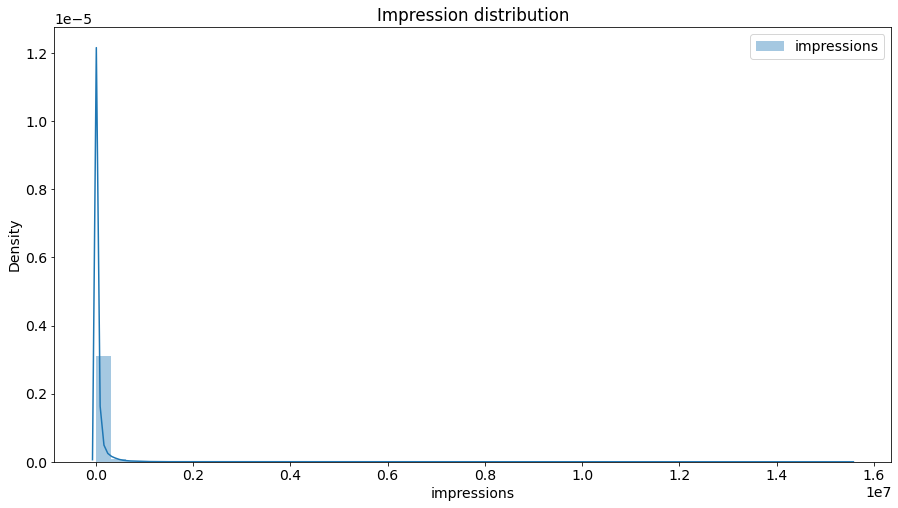

In [19]:
plt.figure(figsize=(15,8))
sns.distplot(df.impressions, label="impressions")
plt.title('Impression distribution')
plt.legend();

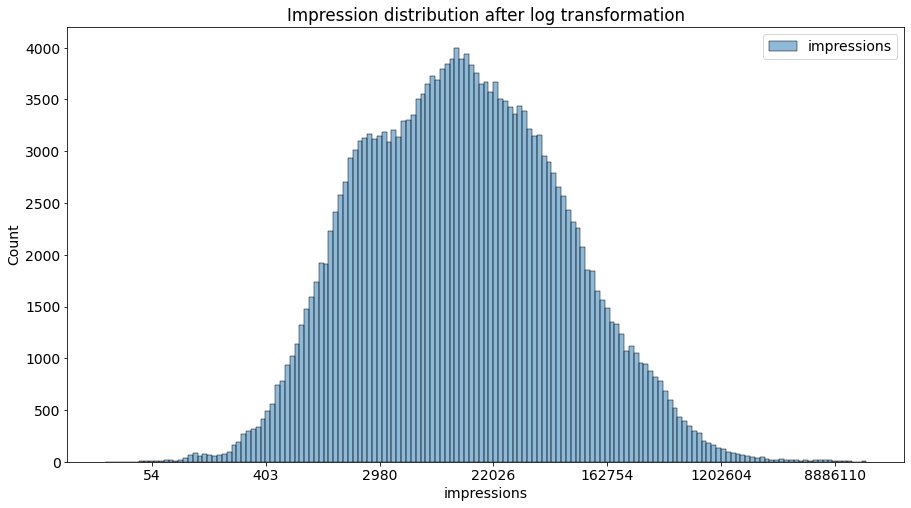

In [20]:
plt.figure(figsize=(15,8))
sns.histplot(np.log(df.impressions+0.01), label="impressions", alpha=0.5)
plt.legend()
plt.title('Impression distribution after log transformation')
labels = [int(np.exp(x)) for x in range(4,18,2)]
plt.xticks(range(4,18,2), labels)
plt.show();

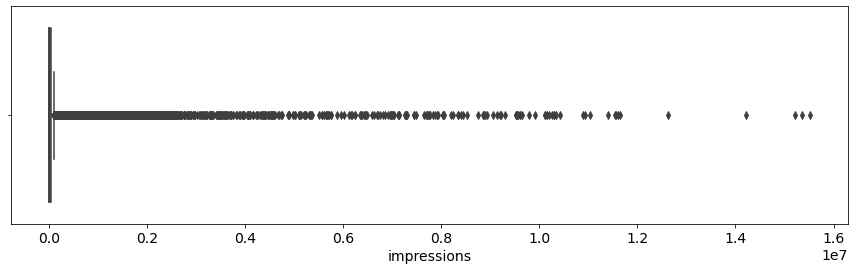

In [21]:
plt.figure(figsize=(15,4))
sns.boxplot(x=df.impressions);

In [22]:
df.impressions.quantile([0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 0.999, 0.9999])

0.2500    3.406000e+03
0.5000    1.233300e+04
0.7500    4.415600e+04
0.9000    1.309040e+05
0.9500    2.562374e+05
0.9900    7.230162e+05
0.9990    3.335610e+06
0.9999    1.002975e+07
Name: impressions, dtype: float64

# Preprocessing

In [23]:
len(df[df['impressions']>=8000000])

52

In [24]:
df = df[df['impressions']<=8000000]

In [25]:
# label encode post_type (0 - image; 1 video) and format (0 - not a story; 1 - story)
le = LabelEncoder()
df['post_type'] = le.fit_transform(df['post_type'])

In [26]:
#ohe = OneHotEncoder()
#enc_df = pd.DataFrame(ohe.fit_transform(df[['post_type']]).toarray())
#df = df.join(enc_df)

In [27]:
feature_names = ['post_type', 'video_views', 'reactions', 'comments', 'potential_reach']
target_name = ['impressions']

X = df[feature_names]
y = df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Dummy Regressor

In [28]:
dr = DummyRegressor(strategy='mean')
dr.fit(X_train, y_train)
y_null = dr.predict(X_test)

print('Linear Regression R-square score (training): {:.3f}'.format(dr.score(X_train, y_train)))
print('Dummy Regressor R-square score (testing): {:.3f}'.format(metrics.r2_score(y_test, y_null)))
print('Dummy Regressor RMSE (testing): {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_null))))

Linear Regression R-square score (training): 0.000
Dummy Regressor R-square score (testing): -0.000
Dummy Regressor RMSE (testing): 201865.524


In [29]:
model_performance_RMSE={}
model_performance_RMSE['DummyRegressor'] = np.sqrt(metrics.mean_squared_error(y_test, y_null))

# Linear Regression

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
linreg = LinearRegression().fit(X_train, y_train)
y_pred = linreg.predict(X_test)

print('Linear Regression R-square score (training): {:.3f}'.format(linreg.score(X_train, y_train)))
print('Linear Regression R-square score (testing): {:.3f}'.format(metrics.r2_score(y_test, y_pred)))
#print('Linear Regression R-square score (testing): {:.3f}'.format(linreg.score(X_test, y_test)))

print('Linear Regression RMSE (testing): {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
linreg.coef_, linreg.intercept_

Linear Regression R-square score (training): 0.846
Linear Regression R-square score (testing): 0.820
Linear Regression RMSE (testing): 85541.039


(array([[ 2.94985222e+03,  2.41740103e-01,  7.00378532e+00,
         -6.44423705e-02,  6.37798421e-02]]),
 array([14115.21942106]))

In [31]:
model_performance_RMSE['Linear Regression'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Linear Regression with Scaling

In [32]:
scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred = linreg.predict(X_test_scaled)


print('Scaled Linear Regression R-square score (training): {:.5f}'.format(linreg.score(X_train_scaled, y_train)))
print('Scaled Linear Regression R-square score (testing): {:.3f}'.format(metrics.r2_score(y_test, y_pred)))

print('Scaled Linear Regression RMSE (testing): {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
linreg.coef_, linreg.intercept_

Scaled Linear Regression R-square score (training): 0.84570
Scaled Linear Regression R-square score (testing): 0.820
Scaled Linear Regression RMSE (testing): 85541.039


(array([[ 2.94985222e+03,  1.05314583e+06,  5.71979537e+06,
         -9.58310892e+04,  3.20057497e+06]]),
 array([14116.75013727]))

In [33]:
model_performance_RMSE['Scaled Linear Regression'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

In [34]:
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linreg = LinearRegression()
linreg.fit(X_train_scaled, y_train)
y_pred_2 = linreg.predict(X_test_scaled)


print('Scaled Linear Regression R-square score (training): {:.5f}'.format(linreg.score(X_train_scaled, y_train)))
print('Scaled Linear Regression R-square score (testing): {:.3f}'.format(metrics.r2_score(y_test, y_pred_2)))

print('Scaled Linear Regression RMSE (testing): {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred_2))))
linreg.coef_, linreg.intercept_

Scaled Linear Regression R-square score (training): 0.84570
Scaled Linear Regression R-square score (testing): 0.820
Scaled Linear Regression RMSE (testing): 85541.039


(array([[   808.61929454,  11534.4082526 , 138143.9486484 ,
           -567.27117669,  73282.60471426]]),
 array([59881.05792852]))

In [35]:
model_performance_RMSE['Standardised Linear Regression'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Ridge Regression with feature Scaling

In [36]:
ridgereg = Ridge().fit(X_train_scaled, y_train)
y_pred = ridgereg.predict(X_test_scaled)

print('Normalised Ridge Regression R-square score (training): {:.5f}'.format(ridgereg.score(X_train_scaled, y_train)))
print('Normalised Ridge Regression R-square score (testing): {:.3f}'.format(metrics.r2_score(y_test, y_pred)))

print('Normalised Ridge Regression RMSE (testing): {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
ridgereg.coef_

Normalised Ridge Regression R-square score (training): 0.84570
Normalised Ridge Regression R-square score (testing): 0.820
Normalised Ridge Regression RMSE (testing): 85541.044


array([[   808.56381124,  11534.65905313, 138143.02843599,
          -567.15653408,  73282.55160628]])

In [37]:
model_performance_RMSE['Ridge Regression'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

## Tuning alpha for Ridge regression

In [38]:
grid_values = {'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
grid_reg_mse = GridSearchCV(ridgereg, param_grid = grid_values, scoring = 'neg_mean_squared_error', cv=10)
grid_reg_mse.fit(X_train_scaled, y_train)

print('Grid best parameter (max. MSE): ', grid_reg_mse.best_params_)
print('Grid best score (MSE): ', np.sqrt(-grid_reg_mse.best_score_))

Grid best parameter (max. MSE):  {'alpha': 25}
Grid best score (MSE):  83363.76040847975


In [39]:
grid_values = {'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
grid_reg_mse = GridSearchCV(ridgereg, param_grid = grid_values, scoring = 'r2', cv=10)
grid_reg_mse.fit(X_train_scaled, y_train)

print('Grid best parameter (max. R2): ', grid_reg_mse.best_params_)
print('Grid best score (MSE): ', grid_reg_mse.best_score_)

Grid best parameter (max. R2):  {'alpha': 25}
Grid best score (MSE):  0.841283766419434


In [40]:
print('Ridge regression: effect of alpha regularization parameter\n')
for this_alpha in range(0,30):
    ridgereg = Ridge(alpha = this_alpha).fit(X_train_scaled, y_train)
    y_pred = ridgereg.predict(X_test_scaled)
    print('Ridge Regression with Alpha: {} R-square score (training): {:.3f}'.format(this_alpha, ridgereg.score(X_train_scaled, y_train)))
    print('Ridge Regression with Alpha: {} R-square score (testing): {:.3f}'.format(this_alpha, metrics.r2_score(y_test, y_pred)))
    print('Ridge Regression with Alpha: {} RMSE (testing): {:.3f}'.format(this_alpha, np.sqrt(metrics.mean_squared_error(y_test, y_pred))))

Ridge regression: effect of alpha regularization parameter

Ridge Regression with Alpha: 0 R-square score (training): 0.846
Ridge Regression with Alpha: 0 R-square score (testing): 0.820
Ridge Regression with Alpha: 0 RMSE (testing): 85541.039
Ridge Regression with Alpha: 1 R-square score (training): 0.846
Ridge Regression with Alpha: 1 R-square score (testing): 0.820
Ridge Regression with Alpha: 1 RMSE (testing): 85541.044
Ridge Regression with Alpha: 2 R-square score (training): 0.846
Ridge Regression with Alpha: 2 R-square score (testing): 0.820
Ridge Regression with Alpha: 2 RMSE (testing): 85541.048
Ridge Regression with Alpha: 3 R-square score (training): 0.846
Ridge Regression with Alpha: 3 R-square score (testing): 0.820
Ridge Regression with Alpha: 3 RMSE (testing): 85541.053
Ridge Regression with Alpha: 4 R-square score (training): 0.846
Ridge Regression with Alpha: 4 R-square score (testing): 0.820
Ridge Regression with Alpha: 4 RMSE (testing): 85541.058
Ridge Regression wit

In [41]:
# set alpha to 25 as tested above
ridgereg = Ridge(alpha=25).fit(X_train_scaled, y_train)
y_pred = ridgereg.predict(X_test_scaled)

print('Normalised Ridge Regression R-square score (training): {:.5f}'.format(ridgereg.score(X_train_scaled, y_train)))
print('Normalised Ridge Regression R-square score (testing): {:.3f}'.format(metrics.r2_score(y_test, y_pred)))

print('Normalised Ridge Regression RMSE (testing): {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
ridgereg.coef_

Normalised Ridge Regression R-square score (training): 0.84570
Normalised Ridge Regression R-square score (testing): 0.820
Normalised Ridge Regression RMSE (testing): 85541.159


array([[   807.23292392,  11540.67645491, 138120.94851623,
          -564.40609779,  73281.27512549]])

In [42]:
model_performance_RMSE['Tuned Ridge Regression'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Random Forest

## Manually tuning n_estimators for Random Forest first

In [43]:
print('Random Forest: effect of n_estimator \n')
manual_estimator=[]
manual_RMSE=[]
for estimator in range(10,200,10):
    rfreg = RandomForestRegressor(n_estimators=estimator, max_features=5, oob_score=True, random_state=1, n_jobs=-1).fit(X_train, y_train.values.ravel())
    y_pred = rfreg.predict(X_test)
    print('when trees={}, Random Forest RMSE (testing): {:.3f}'.format(estimator, np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
    print('when trees={}, Random Forest OOB Score: {:.3f}'.format(estimator, rfreg.oob_score_))
    manual_estimator.append(estimator)
    manual_RMSE.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Random Forest: effect of n_estimator 



/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


when trees=10, Random Forest RMSE (testing): 71244.416
when trees=10, Random Forest OOB Score: 0.880


/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:833: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


when trees=20, Random Forest RMSE (testing): 69037.196
when trees=20, Random Forest OOB Score: 0.902
when trees=30, Random Forest RMSE (testing): 68220.994
when trees=30, Random Forest OOB Score: 0.907
when trees=40, Random Forest RMSE (testing): 68063.771
when trees=40, Random Forest OOB Score: 0.909
when trees=50, Random Forest RMSE (testing): 67669.623
when trees=50, Random Forest OOB Score: 0.910
when trees=60, Random Forest RMSE (testing): 67637.606
when trees=60, Random Forest OOB Score: 0.912
when trees=70, Random Forest RMSE (testing): 67545.652
when trees=70, Random Forest OOB Score: 0.912
when trees=80, Random Forest RMSE (testing): 67483.404
when trees=80, Random Forest OOB Score: 0.913
when trees=90, Random Forest RMSE (testing): 67334.901
when trees=90, Random Forest OOB Score: 0.913
when trees=100, Random Forest RMSE (testing): 67336.513
when trees=100, Random Forest OOB Score: 0.913
when trees=110, Random Forest RMSE (testing): 67351.353
when trees=110, Random Forest OOB

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

rfreg = RandomForestRegressor(n_estimators=sorted(zip(manual_estimator,manual_RMSE), key=lambda x:x[1])[0][0], 
                              max_features=5, oob_score=True, 
                              random_state=1, n_jobs=-1).fit(X_train, y_train.values.ravel())
y_pred = rfreg.predict(X_test)

print('Random Forest RMSE (testing): {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Random Forest OOB Score: {:.3f}'.format(rfreg.oob_score_))

Random Forest RMSE (testing): 67116.308
Random Forest OOB Score: 0.914


In [45]:
model_performance_RMSE['Manually Tuned Random Forest'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

## Determine best combo of n_estimators and max_features for Random Forest

In [46]:
# find out n_estimator with minimal RMSE - based on manual tuning
min_manual_estimator = sorted(zip(manual_estimator,manual_RMSE), key=lambda x:x[1])[0][0]
# find out number of features - based on rule of thumb (classifican squart root of number of features)
n_features = int(len(feature_names)/3)
(min_manual_estimator,n_features)

(180, 1)

In [48]:
PARAM_GRID = {'n_estimators': list(range(min_manual_estimator, min_manual_estimator+30, 5)), 
              'max_features': [n_features, n_features+1, n_features+2, n_features+3]}

gs = GridSearchCV(estimator = RandomForestRegressor(random_state=1, n_jobs=-1), 
                  scoring = 'neg_root_mean_squared_error', param_grid=PARAM_GRID, verbose=3)
gs.fit(X_train, y_train.values.ravel())
gs.best_params_

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV 1/5] END ...............max_features=1, n_estimators=180; total time=  45.0s
[CV 2/5] END ...............max_features=1, n_estimators=180; total time=  27.2s
[CV 3/5] END ...............max_features=1, n_estimators=180; total time=  28.4s
[CV 4/5] END ...............max_features=1, n_estimators=180; total time=  26.2s
[CV 5/5] END ...............max_features=1, n_estimators=180; total time=  30.2s
[CV 1/5] END ...............max_features=1, n_estimators=185; total time=  34.2s
[CV 2/5] END ...............max_features=1, n_estimators=185; total time=  36.8s
[CV 3/5] END ...............max_features=1, n_estimators=185; total time=  32.7s
[CV 4/5] END ...............max_features=1, n_estimators=185; total time=  28.0s
[CV 5/5] END ...............max_features=1, n_estimators=185; total time=  26.0s
[CV 1/5] END ...............max_features=1, n_estimators=190; total time=  37.0s
[CV 2/5] END ...............max_features=1, n_e

{'max_features': 3, 'n_estimators': 185}

In [49]:
rfreg = RandomForestRegressor(n_estimators=gs.best_params_['n_estimators'], max_features=gs.best_params_['max_features'], 
                              oob_score=True, random_state=1, n_jobs=-1).fit(X_train, y_train.values.ravel())
y_pred = rfreg.predict(X_test)

print('Random Forest RMSE (testing): {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Random Forest OOB Score: {:.3f}'.format(rfreg.oob_score_))

Random Forest RMSE (testing): 66792.912
Random Forest OOB Score: 0.916


In [50]:
model_performance_RMSE['Grid Search Tuned Random Forest'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# LightBGM

In [51]:
feature_names = ['post_type', 'video_views', 'reactions', 'comments', 'potential_reach']
target_name = ['impressions']

df['post_type'] = df['post_type'].astype('category')
df['format'] = df['format'].astype('category')

X = df[feature_names]
y = df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)


X_train, X_validation, y_train, y_validation = train_test_split(
    X_train, y_train, random_state=1)

cat = ['post_type']

In [52]:
# dataset for lightgbm
train_set = lgbm.Dataset(data=X_train, 
                         label=y_train,
                         categorical_feature=cat, 
                         free_raw_data=False)

validation_set = lgbm.Dataset(data=X_validation, 
                         label=y_validation,
                         categorical_feature=cat, 
                         free_raw_data=False)

test_set = lgbm.Dataset(data=X_test, 
                         label=y_test,
                         categorical_feature=cat, 
                         free_raw_data=False) 

In [53]:
# model parameters defined
lgbm_params = {'objective': 'regression',
               'max_depth': 100, 
               'n_estimators': 100000,
               'learning_rate': 0.0001,                    
               'boost_from_average': False,
               'feature_fraction' : 0.7,
               'metric': 'root_mean_squared_error'
          }

evaluation_results = {}

In [54]:
model_lgbm = lgbm.train(train_set = train_set, 
                   params = lgbm_params,
                   num_boost_round = 10000,
                   valid_sets = [train_set, validation_set],
                   valid_names = ['Train', 'Validation'], 
                   evals_result = evaluation_results,
                   verbose_eval = 500,
                   early_stopping_rounds=100,
                   )
y_pred = model_lgbm.predict(X_test)

/usr/local/lib/python3.9/site-packages/lightgbm/engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005278 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1023
[LightGBM] [Info] Number of data points in the train set: 120471, number of used features: 5
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
Training until validation scores don't improve for 100 rounds


/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/usr/local/lib/python3.9/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[500]	Train's rmse: 206601	Validation's rmse: 210039
[1000]	Train's rmse: 198752	Validation's rmse: 202221
[1500]	Train's rmse: 191324	Validation's rmse: 194811
[2000]	Train's rmse: 184307	Validation's rmse: 187808
[2500]	Train's rmse: 177654	Validation's rmse: 181168
[3000]	Train's rmse: 171382	Validation's rmse: 174916
[3500]	Train's rmse: 165456	Validation's rmse: 169013
[4000]	Train's rmse: 159858	Validation's rmse: 163435
[4500]	Train's rmse: 154589	Validation's rmse: 158188
[5000]	Train's rmse: 149622	Validation's rmse: 153233
[5500]	Train's rmse: 144942	Validation's rmse: 148566
[6000]	Train's rmse: 140543	Validation's rmse: 144176
[6500]	Train's rmse: 136406	Validation's rmse: 140059
[7000]	Train's rmse: 132513	Validation's rmse: 136168
[7500]	Train's rmse: 128879	Validation's rmse: 132538
[8000]	Train's rmse: 125473	Validation's rmse: 129143
[8500]	Train's rmse: 122281	Validation's rmse: 125953
[9000]	Train's rmse: 119292	Validation's rmse: 122952
[9500]	Train's rmse: 116489	V

In [55]:
model_performance_RMSE['LightBGM'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# CatBoost

In [56]:
SEED=1
#model parameters defined
model_cat = CatBoostRegressor(iterations=10000,
                          depth=16,
                          loss_function='RMSE', 
                          cat_features=cat,
                          thread_count=-1,
                          early_stopping_rounds=100,
                          verbose=True,
                          random_seed=SEED,
                          has_time=False
                          )

In [57]:
model_cat.fit(Pool(data=X_train, 
               label=y_train, 
              cat_features=cat,
              #weight=X_train.COL_YOU_WANT_TO_WEIGHT
              ),
          eval_set = (X_validation, y_validation),
          logging_level='Verbose'
         )

y_pred = model_cat.predict(X_test)

Learning rate set to 0.02715
0:	learn: 202271.5292963	test: 205819.2318133	best: 205819.2318133 (0)	total: 2.22s	remaining: 6h 10m 21s
1:	learn: 198136.7908569	test: 201696.0292362	best: 201696.0292362 (1)	total: 2.48s	remaining: 3h 26m 13s
2:	learn: 194127.0283647	test: 197722.3791227	best: 197722.3791227 (2)	total: 4.27s	remaining: 3h 56m 56s
3:	learn: 190225.5749215	test: 193842.4464059	best: 193842.4464059 (3)	total: 5.34s	remaining: 3h 42m 21s
4:	learn: 186463.4902164	test: 190124.8461629	best: 190124.8461629 (4)	total: 5.91s	remaining: 3h 17m 1s
5:	learn: 182796.5384775	test: 186416.6918727	best: 186416.6918727 (5)	total: 7.69s	remaining: 3h 33m 35s
6:	learn: 179272.9072550	test: 182921.8344376	best: 182921.8344376 (6)	total: 7.82s	remaining: 3h 6m 1s
7:	learn: 175900.4239217	test: 179509.5193710	best: 179509.5193710 (7)	total: 8.31s	remaining: 2h 52m 59s
8:	learn: 172580.1622712	test: 176207.5553765	best: 176207.5553765 (8)	total: 8.37s	remaining: 2h 34m 56s
9:	learn: 169387.792

In [58]:
model_performance_RMSE['CatBoost'] = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Model Evaluation

In [59]:
sorted(model_performance_RMSE.items(), key=lambda x:x[1])

[('Grid Search Tuned Random Forest', 66792.91248909173),
 ('Manually Tuned Random Forest', 67116.3076607449),
 ('Linear Regression', 85541.03890281366),
 ('Scaled Linear Regression', 85541.03890281367),
 ('Standardised Linear Regression', 85541.03890281367),
 ('Ridge Regression', 85541.04359169057),
 ('Tuned Ridge Regression', 85541.15877166428),
 ('LightBGM', 91945.94076373828),
 ('CatBoost', 93225.70993299826),
 ('DummyRegressor', 201865.523594521)]

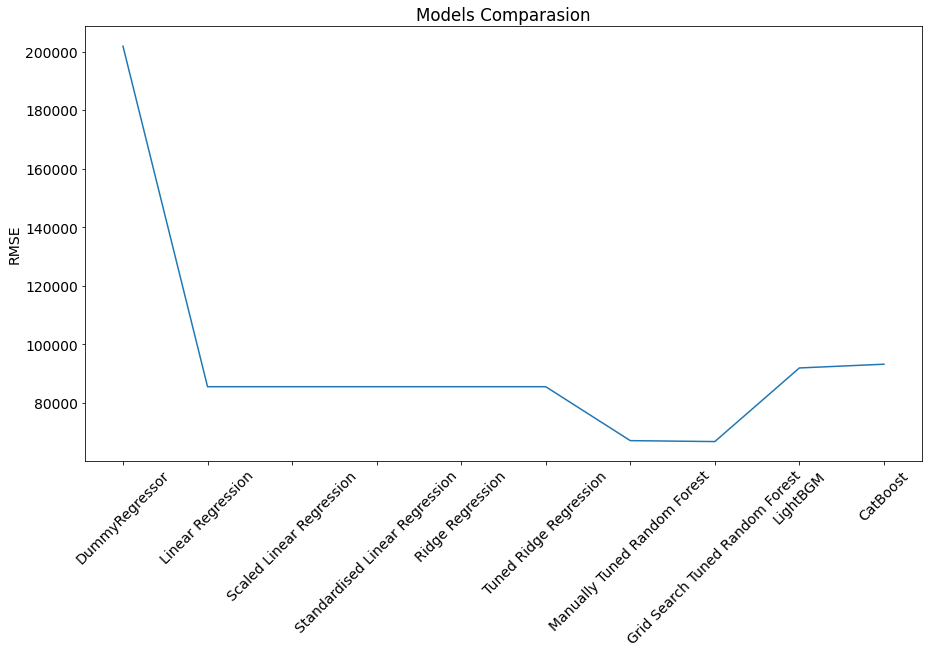

In [60]:
plt.figure(figsize=(15,8))
plt.plot(list(model_performance_RMSE.keys()),list(model_performance_RMSE.values()))
plt.xticks(rotation=45)
plt.ylabel('RMSE')
plt.title('Models Comparasion');

## Best Model - Random Forest

In [77]:
feature_names = ['post_type', 'video_views', 'reactions', 'comments', 'potential_reach']
target_name = ['impressions']

X = df[feature_names]
y = df[target_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

rfreg = RandomForestRegressor(n_estimators=185, max_features=3, 
                              oob_score=True, random_state=1, n_jobs=-1).fit(X_train, y_train.values.ravel())
y_pred = rfreg.predict(X_test)

print('Random Forest RMSE (testing): {:.3f}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print('Random Forest OOB Score: {:.3f}'.format(rfreg.oob_score_))

Random Forest RMSE (testing): 66792.912
Random Forest OOB Score: 0.916


## Feature Importances - Random Forest

In [78]:
# Compute feature importances
pd.DataFrame({
    'feature': feature_names, 
    'importance': rfreg.feature_importances_}
).sort_values(by='importance', ascending=False)

,feature,importance
2,reactions,0.464281
4,potential_reach,0.420068
3,comments,0.091017
1,video_views,0.022883
0,post_type,0.001752


## Cross Validate Random Forest Model

In [63]:
np.mean(np.sqrt(-cross_val_score(rfreg, X, y.values.ravel(), cv=5, scoring='neg_mean_squared_error')))

71545.69642489101

- very robust model, generalises well

## Develop Intuition from Random Forest Model

/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


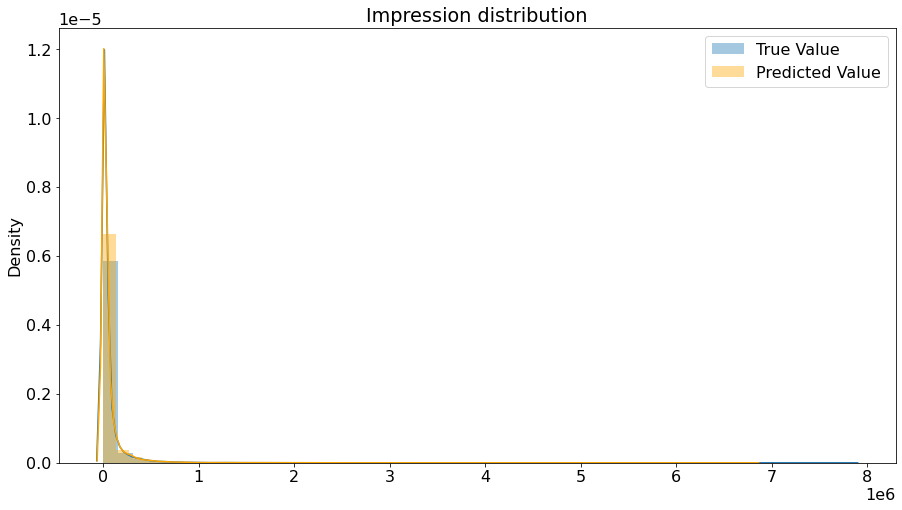

In [64]:
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(15,8))
sns.distplot(y_test, label="True Value")
sns.distplot(y_pred, label="Predicted Value", color="orange")
plt.title('Impression distribution')
plt.legend();

- can't tell much. Need to log transform the target value - impressions

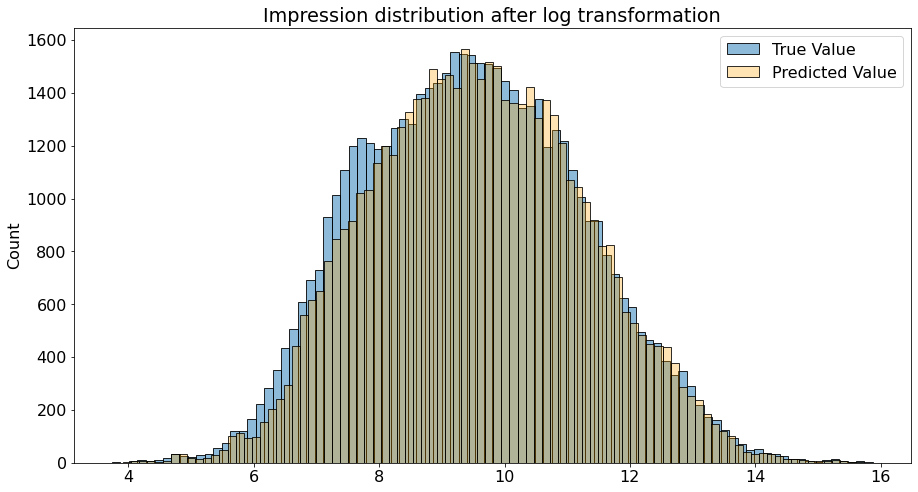

In [65]:
plt.figure(figsize=(15,8))
sns.histplot(np.log(y_test+0.01), label="True Value", alpha=0.5)
sns.histplot(np.log(y_pred+0.01), label="Predicted Value", color="orange", alpha=0.3)
plt.legend()
plt.title('Impression distribution after log transformation')
plt.show();

- better but xtick is on natural log scale

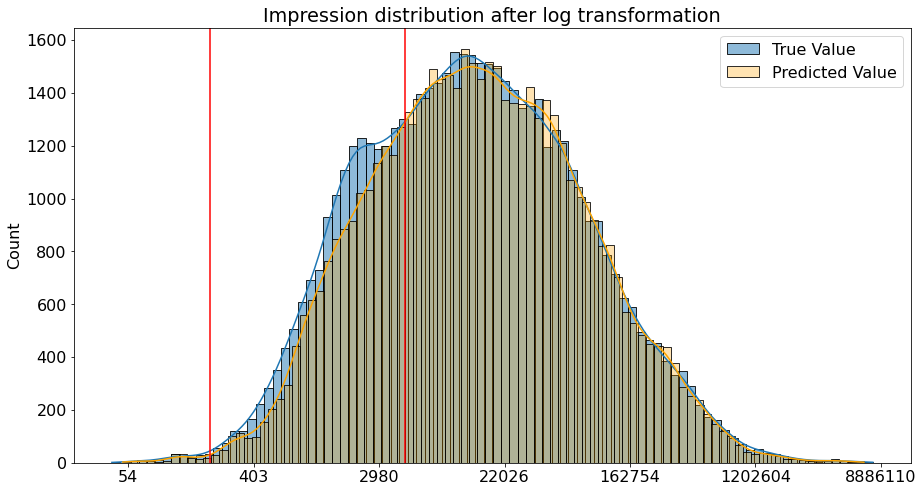

In [66]:
plt.figure(figsize=(15,8))
sns.histplot(np.log(y_test+0.01), label="True Value", alpha=0.5, kde=True)
sns.histplot(np.log(y_pred+0.01), label="Predicted Value", color="orange", alpha=0.3, kde=True)
plt.legend()
plt.title('Impression distribution after log transformation')
labels = [int(np.exp(x)) for x in range(4,18,2)]
plt.xticks(range(4,18,2), labels)
plt.axvline(x=np.log(200), color='r', linestyle='-')
plt.axvline(x=np.log(4500), color='r', linestyle='-')
plt.show();

In [67]:
y_test.quantile([0.0028,0.30389])

,impressions
0.00280,171.92040
0.30389,4747.18227


In [68]:
y_test.quantile([0.25, 0.5, 0.75])

,impressions
0.25,3490.0
0.50,12571.5
0.75,44580.5


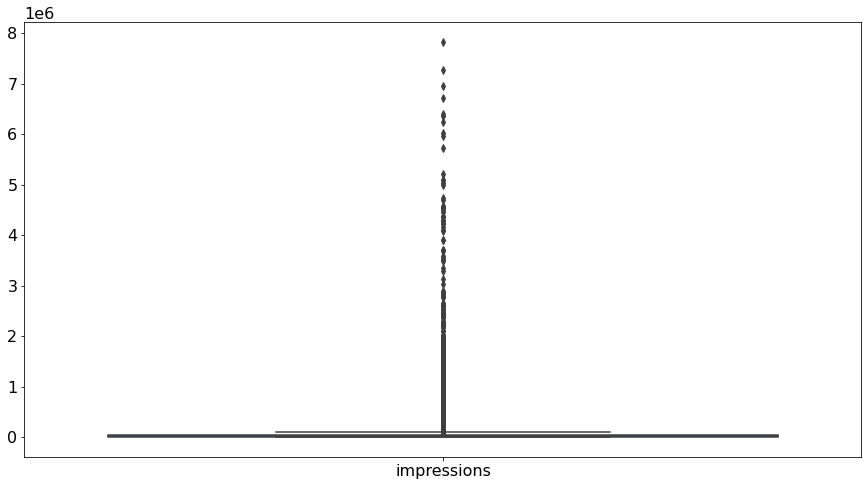

In [69]:
# distribution of target variable
plt.figure(figsize=(15,8))
sns.boxplot(data=y_test, orient="v");

In [70]:
y_test[y_test.impressions>724575.31].shape[0]

520

- Random Forest lowest RMSE of impression achieves by under-predicting low-value instances and over-predicting high-value instances
- this strategy is not optimal as there are lots of low-value instances - 90% instances under 128268.40

# Predict New Instances

In [103]:
rfreg.predict([[1, 343, 131, 19, 2085]]) #actual impression: 636373
#feature_names = ['post_type_IMAGE:0-image;1-video', 
#'video_views', 'reactions', 'comments', 'potential_reach']

array([1038.77297297])

# Interpretability

In [72]:
#import shap
#%timeit
#shap_values = shap.TreeExplainer(rfreg).shap_values(X_train)
#shap.summary_plot(shap_values, X_train, plot_type="bar")

In [73]:
#shap.summary_plot(shap_values, X_train)

# Decision Tree

In [74]:
treereg = DecisionTreeRegressor(max_depth=3, max_features=5).fit(X_train, y_train)

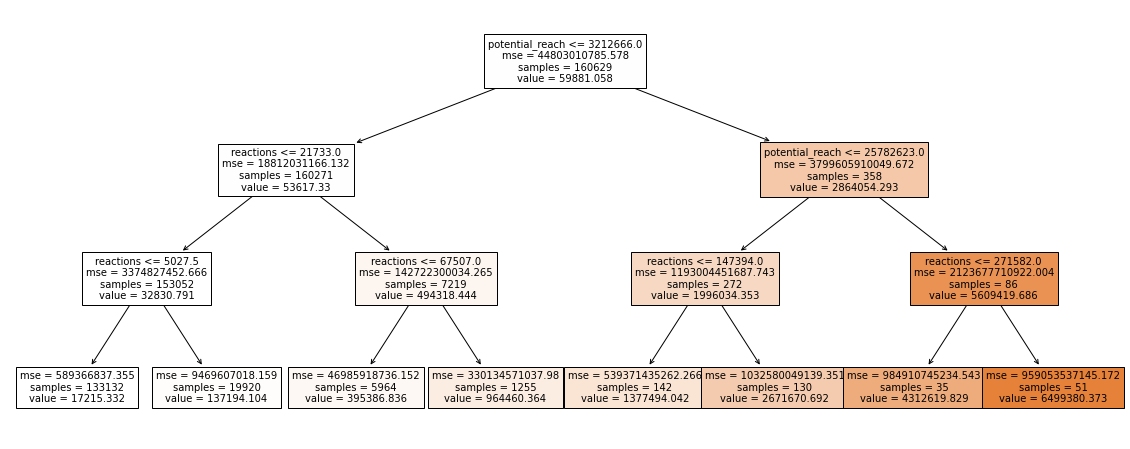

In [75]:
fig, ax = plt.subplots(figsize=(20,8))
tree.plot_tree(treereg, feature_names=feature_names, class_names=target_name, filled=True, fontsize=10);

In [76]:
#https://docs.google.com/presentation/d/1_wljom0EVPC8sJE-f6tjQ-jmcUWjB6jzQSg1voF5YY0/edit#slide=id.g7402f38921_0_5

In [79]:
validation_df.to_csv('/Users/sili/Documents/Dove/impression/oauth/data_20210101-20210115.csv')